<a href="https://colab.research.google.com/github/jbinteam/010723305/blob/main/%E0%B9%87Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การบ้านสัปดาห์ที่ 3
- ความเข้าใจเกี่ยวกับ Histogram ,การปรับปรุงภาพด้วย histogram, ความรูัพื้นฐานของการทำ filter ภาพ


ข้อมูล library
["numpy.random.normal"](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

In [ ]:
import numpy as np #เรียกใช้งาน library numpy โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ np
from PIL import Image #เรียกใช้งาน Image จาก library PIL
from matplotlib import pyplot as plt #เรียกใช้งาน pyplot จาก matplotlib โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ plt


โปรแกรมด้านล่างเป็นโปรแกรมที่สุ่มค่า intensity ของ channel R, G, B เพื่อมาแสดงผลเป็นภาพสีแบบแยก channel และภาพสีที่เป็น RGB

ให้นักศึกษาลองรันหรือแก้ไขโปรแกรมแล้วสังเกตุผล

75.5615342257253


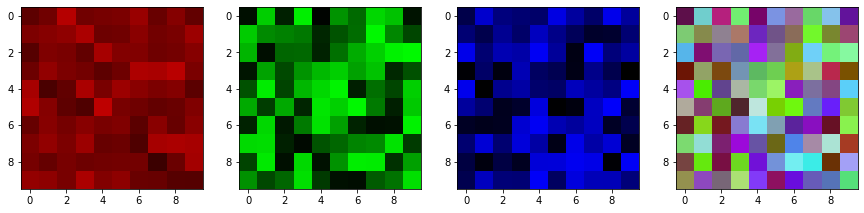

In [ ]:
mu, sigma = 125, 30 # mean and standard deviation
r = np.random.normal(mu, sigma, 100).astype(int)

g=np.random.randint(0, 255, 100)
g_mean=np.mean(g)
g_std_dev=np.std(g, ddof=1)

b=np.random.randint(0, 255, 100)
b_mean=np.mean(b)
b_std_dev=np.std(b, ddof=1)

r=r.reshape((10,10))
g=g.reshape((10,10))
b=b.reshape((10,10))

#สำหรับแสดงผล　histogram

print(b_std_dev)

r_vec=np.array([1,0,0])[None, None, :]
g_vec=np.array([0,1,0])[None, None, :]
b_vec=np.array([0,0,1])[None, None, :]

# print(r)
# print(g)
# print(b)

output_r=r[:,:,None]*r_vec
output_g=g[:,:,None]*g_vec
output_b=b[:,:,None]*b_vec

outputRGB=output_r+output_g+output_b

display_all_output=np.hstack((output_r,output_g,output_b,outputRGB))


fig, ((ax1, ax2,ax3, ax4)) = plt.subplots(nrows=1, ncols=4)
fig.set_figwidth(15)
fig.set_figheight(15)
ax1.imshow(output_r)
ax2.imshow(output_g)
ax3.imshow(output_b)
ax4.imshow(outputRGB)


plt.show()

โปรแกรมด้านล่างแสดง histogram ของแต่ละภาพจากผลลัพธ์ของโปรแกรมด้านบน
ให้นักศึกษารันหรือแก้ไขโปรแกรมด้านล่างแล้วสังเกตุผลลัพธ์

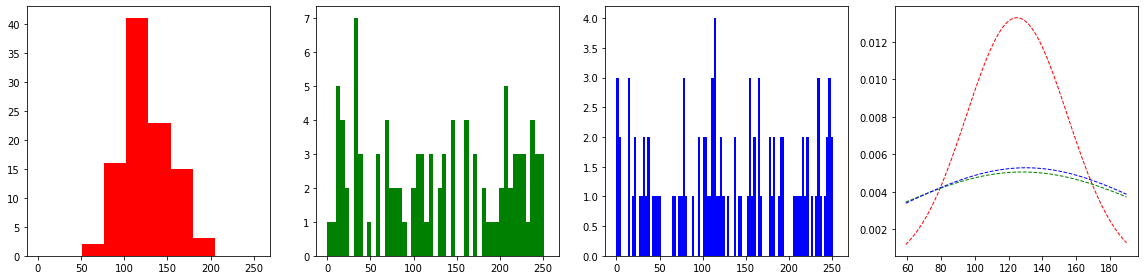

In [ ]:
#แสดงผล 
n_bins=100 #จำนวน bin ของข้อมูล
fig, ((hist_r, hist_g,hist_b, hist_RGB)) = plt.subplots(nrows=1, ncols=4)
fig.set_figwidth(16)
fig.set_figheight(4)

hist_r.hist(r.flatten(),10,[0,256], color = 'r') # แสดง histogram จำนวน 10 bins
hist_g.hist(g.flatten(),50,[0,256], color = 'g') # แสดง histogram จำนวน 50 bins
hist_b.hist(b.flatten(),100,[0,256], color = 'b') # แสดง histogram จำนวน 100 bins

n, bins, ignored = hist_r.hist(r.flatten(), bins=n_bins, density=True)

hist_RGB.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=1, color='r',linestyle='--')

hist_RGB.plot(bins, 1/(g_std_dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - g_mean)**2 / (2 * g_std_dev**2) ),
         linewidth=1, color='g',linestyle='--')

hist_RGB.plot(bins, 1/(b_std_dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - b_mean)**2 / (2 * b_std_dev**2) ),
         linewidth=1, color='b',linestyle='--')

# plt.imshow(display_all_output)
plt.tight_layout()
plt.show()

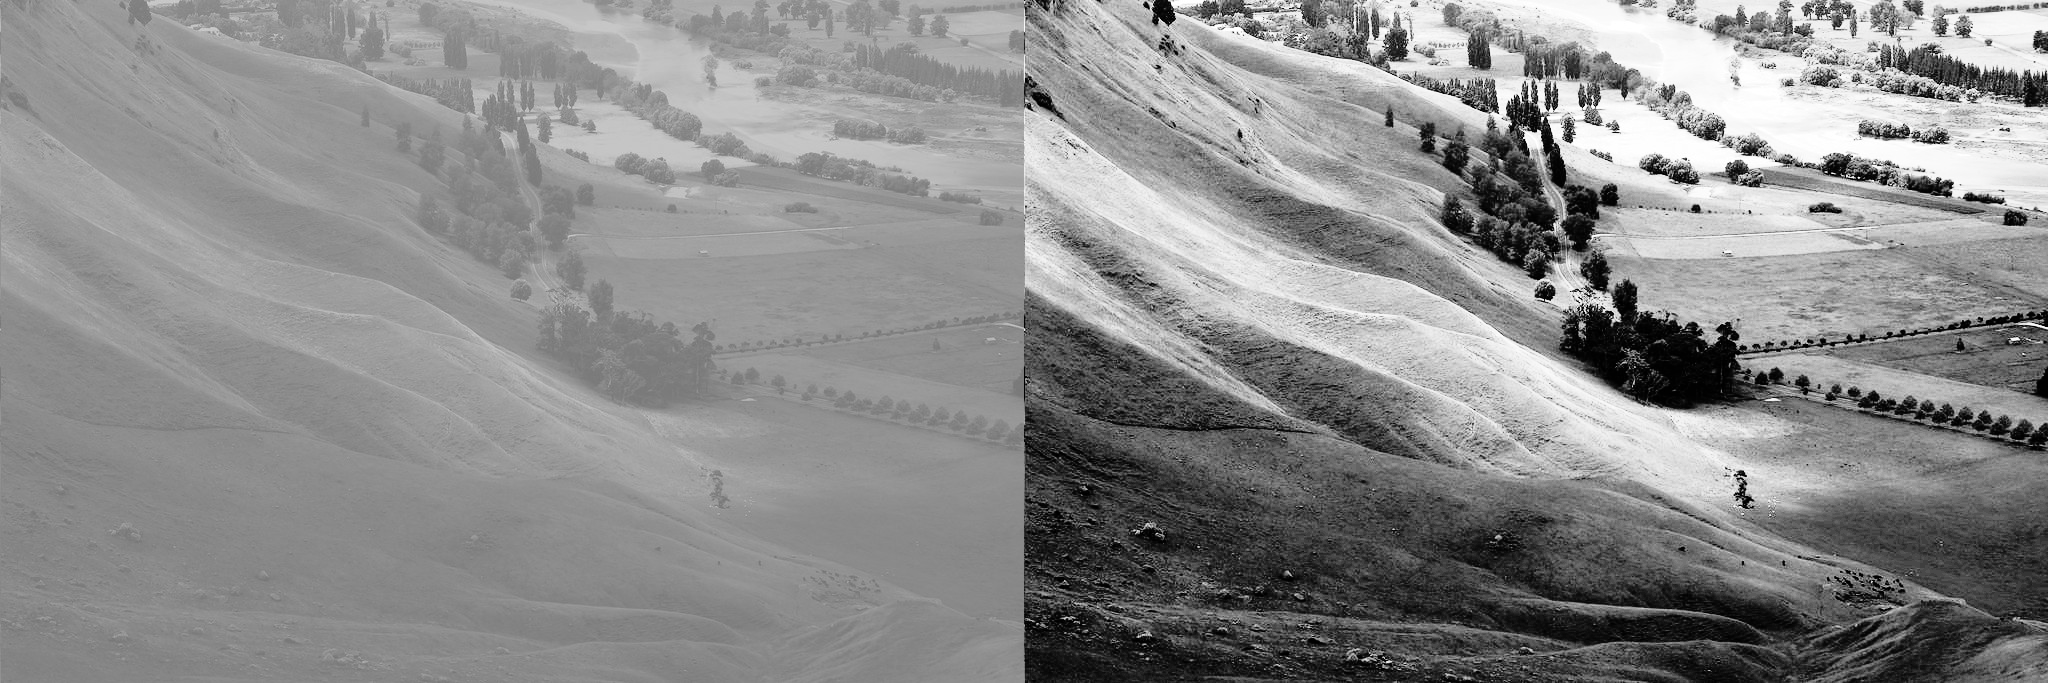

In [ ]:
from skimage import io
from google.colab.patches import cv2_imshow
from skimage.util import img_as_ubyte
import cv2

urls="https://github.com/jbinteam/010723305/blob/main/images/Unequalized_Hawkes_Bay_NZ.jpg?raw=true"
image = io.imread(urls)
cv_img = img_as_ubyte(image) #แปลงข้อมูล unsigned byte เป็น image
cv_img = cv2.cvtColor(cv_img,cv2.COLOR_RGB2GRAY)


#ใช้ library opencv ในการทำ　histogram equalization
equ = cv2.equalizeHist(cv_img)
res = np.hstack((cv_img,equ))
cv2_imshow(res)

## แบบฝึกหัดที่ 3.1

**วัตถุประสงค์**
- เพื่อทดสอบความรู้ความเข้าใจในเรื่อง histogram equalization


**โจทย์:** ให้นักศึกษาทำการเขียนโปรแกรมเพื่อทำ histogram equalization ให้ได้ภาพผลลัพธ์ที่มีค่า max intensity ไม่เกิน 150 โดยไม่ใช้คำสั่ง 
cv2.equalizeHist(__)

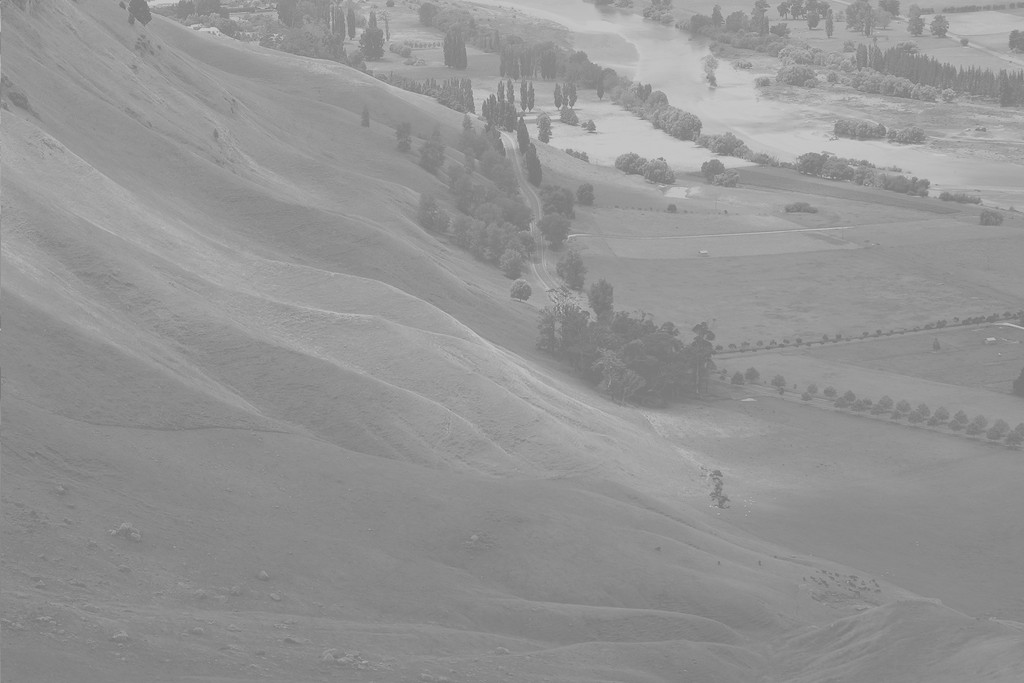

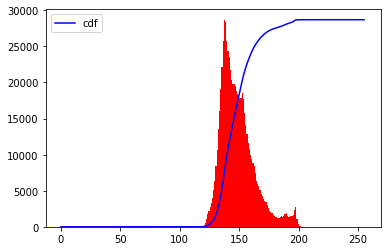

In [ ]:
num_bins=256
hist,bins = np.histogram(cv_img.flatten(),num_bins,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b',label='cdf')
plt.hist(cv_img.flatten(),num_bins,[0,256], color = 'r')
plt.legend()
cv2_imshow(cv_img)

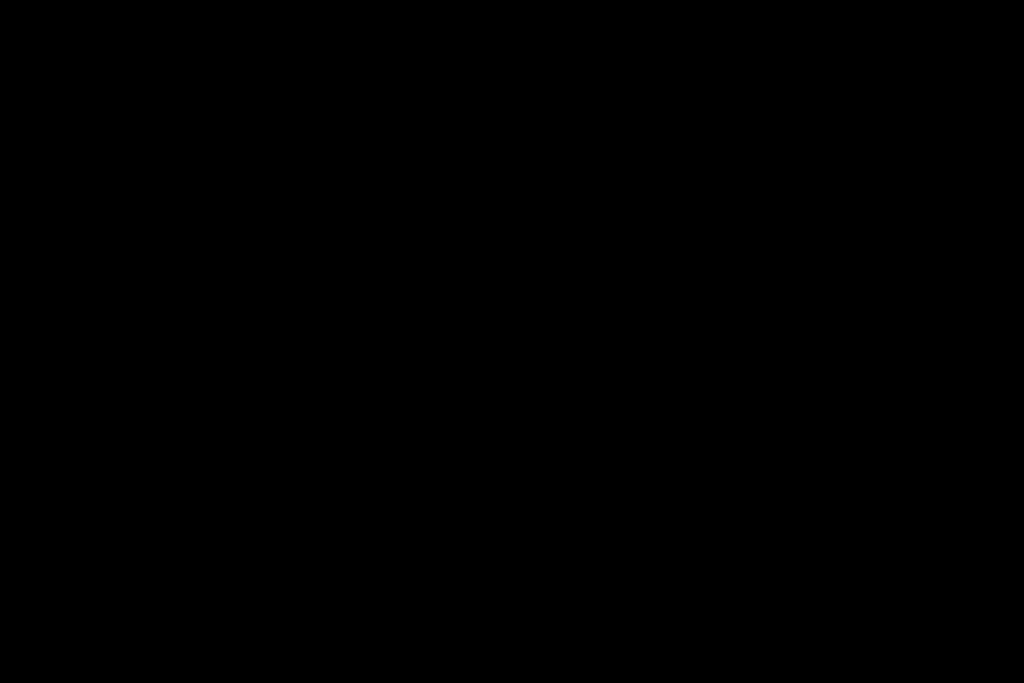

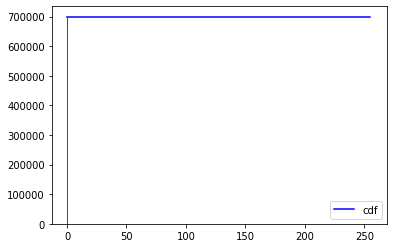

In [ ]:
cv_flatten=cv_img.flatten() #จัดการ shape ของข้อมูลเป็น one dimension array
new_img=np.zeros_like(cv_flatten) #สร้างตัวแปรใหม่เพื่อรอเก็บค่าจากการประมวลผล
cdf_min=np.min(cdf[np.nonzero(cdf)])


######### เพิ่มเติมโค๊ดลงใน for loop ด้านล่าง #########

# for i in range(cv_flatten.size):
  
  # new_img[i]=

#################################################

w=cv_img.shape[0]
h=cv_img.shape[1]

im=new_img.reshape(w,h)

num_bins=256
new_hist,bins = np.histogram(new_img,num_bins,[0,256])

cdf = new_hist.cumsum()

cdf_normalized = cdf * float(new_hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b',label='cdf')
plt.hist(new_img,num_bins,[0,256], color = 'r')
plt.legend()

cv2_imshow(im)

- ให้นักศึกษารันโค๊ดด้านล่าง แล้วสังเกตุผลลัพธ์
- นักศึกษาทดลองแก้ไขขนาดของ kernel หรือแก้ kernel coefficiant แล้วสังเกตุผลลัพธ์ที่เปลี่ยนไป


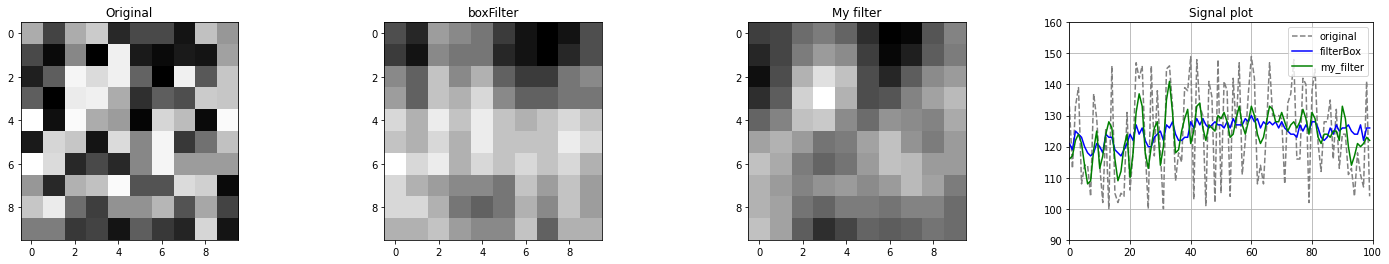

In [ ]:
rand_data=np.random.randint(100, 150, 100)
noise_img=rand_data.reshape((10,10))
noise_img = np.array(noise_img, dtype=np.uint8) #convert int64 to uint8 for operating with opencv
ksizeWidth=5 # ทดลองเปลี่ยนขนาดแล้วสังเกตุผลลัพธ์
ksizeHeight=5 #
filtered_img = cv2.boxFilter(noise_img, -1, (ksizeWidth,ksizeHeight))

#      boxFilter    
#                         |1 1 1|   |1/9 1/9 1/9|
# K=1/(ksize.w*ksize.h))* |1 1 1| = |1/9 1/9 1/9|
#                         |1 1 1|   |1/9 1/9 1/9|
#

my_kernel=np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])
# print(my_kernel)
filtered_img2=cv2.filter2D(noise_img,-1,my_kernel)

fig, ((img_plot,boxfilter_plot,my_filtered_plot, img_as_signal)) = plt.subplots(nrows=1, ncols=4)
img_plot.title.set_text('Original')
img_plot.imshow(noise_img,'gray')

boxfilter_plot.title.set_text('boxFilter')
boxfilter_plot.imshow(filtered_img,'gray')

my_filtered_plot.title.set_text('My filter')
my_filtered_plot.imshow(filtered_img2,'gray')
img_as_signal.axis([0, 100, 90, 160])

img_as_signal.title.set_text('Signal plot')
img_as_signal.plot(rand_data,color = 'gray',linestyle='--',label='original') #
img_as_signal.plot(filtered_img.flatten(),color = 'b',label='filterBox')
img_as_signal.plot(filtered_img2.flatten(),color = 'g',label='my_filter')
img_as_signal.legend()
img_as_signal.grid()

# fig.tight_layout()
fig.set_figwidth(25)
fig.show()


## แบบฝึกหัดที่ 3.2

**วัตถุประสงค์**
- เพื่อทดสอบความรู้ความเข้าใจเรื่องการทำ filter, image convolutional

**โจทย์:** ให้นักศึกษาทำการเขียนโปรแกรมเพื่อทำการลด salt and peppor noise ออกจากภาพด้านล่าง ด้วยวิธีใดก็ได้ 

**คำถาม** 

3.2.1 ถ้าเปลี่ยน kernel filter ให้ใหญ่ขึ้นจะส่งผลให้ผลลัพธ์ออกมาเป็นแบบใด เพราะอะไร

3.2.2 

(512, 512)


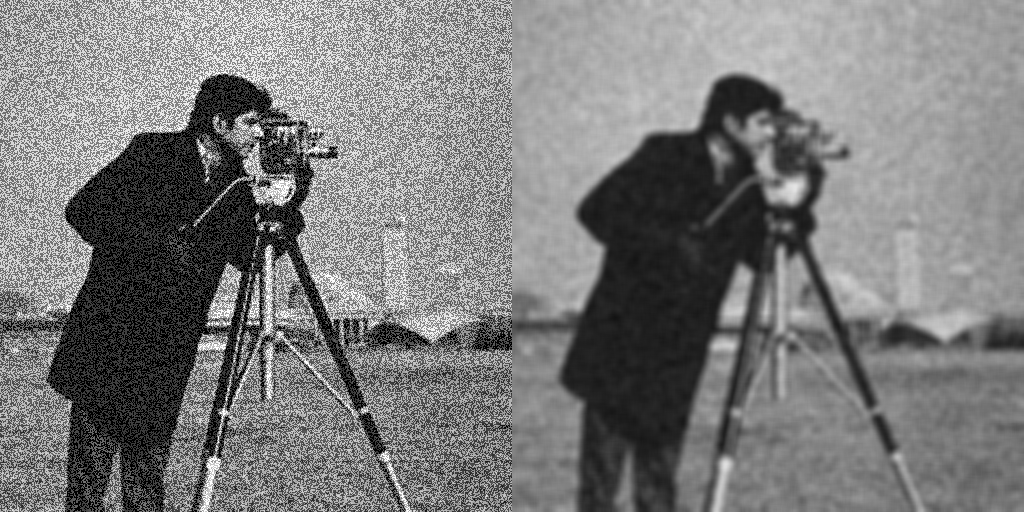

In [ ]:
url_camera_man_img="https://github.com/jbinteam/010723305/blob/main/images/cameraman_noised.png?raw=true"
camMan_image = io.imread(url_camera_man_img)
cv_camMan_img = img_as_ubyte(camMan_image)

## 3.2
camMan_filtered_img = cv2.GaussianBlur(cv_camMan_img,(11,11),cv2.BORDER_DEFAULT)

output_images=np.hstack((cv_camMan_img,camMan_filtered_img))
print(cv_camMan_img.shape)
cv2_imshow(output_images)